<a href="https://colab.research.google.com/github/Ayush-local/ML-AI/blob/main/End_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
df= pd.read_csv('/content/placement.csv')

In [18]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.2,122,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,141,0


#Steps
1. Preprocess + EDA + Feature selection
2. Extract input and output
3. Scale the values
4. Train test split
4. Train the model
5. Evalute the model/model selection
6. Deploy the model

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [20]:
df.shape

(100, 4)

In [21]:
df = df.iloc[:,1:]

In [22]:
df.head()

,cgpa,iq,placement
0,6.2,122,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,141,0


In [23]:
import matplotlib.pyplot as plt

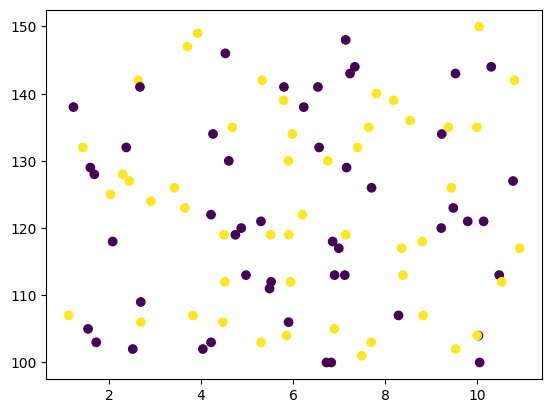

In [25]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [26]:
x = df.iloc[:,0:2]
y =df.iloc[:,-1]


In [27]:
x

,cgpa,iq
0,6.200000,122
1,5.900000,106
2,5.300000,121
3,7.400000,132
4,5.800000,141
...,...,...
95,7.811069,140
96,9.534384,102
97,2.372935,132
98,9.480387,123


In [28]:
y

,placement
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,1


In [29]:
y.shape

(100,)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [33]:
x_train

,cgpa,iq
10,4.975157,113
88,9.527833,143
41,4.677138,135
54,8.540948,136
36,5.898786,130
...,...,...
92,9.218902,120
25,10.140212,121
21,3.700483,147
6,4.495135,119


In [34]:
y_train

,placement
10,0
88,0
41,1
54,1
36,1
98,0
59,1
68,0
50,0
20,0


In [35]:
x_test

,cgpa,iq
42,5.944370,112
97,2.372935,132
48,10.533596,112
16,1.719628,103
0,6.200000,122
47,4.514260,112
1,5.900000,106
87,3.921838,149
3,7.400000,132
51,5.980731,134


In [36]:
y_test

,placement
42,1
97,0
48,1
16,0
0,1
47,1
1,0
87,1
3,1
51,1


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)

In [40]:
x_train

array([[-0.46194901, -0.68703302],
       [ 1.20601252,  1.42811994],
       [-0.5711341 ,  0.86407915],
       [ 0.84444777,  0.93458425],
       [-0.12355943,  0.51155366],
       [ 1.18862967,  0.01801797],
       [-0.33401261,  1.35761484],
       [ 1.49105662,  1.49862504],
       [ 0.7524285 , -1.11006361],
       [-0.00213002,  1.07559445],
       [-1.30006269, -0.96905341],
       [ 0.40442288,  1.49862504],
       [ 1.67607802,  1.35761484],
       [ 0.33893244,  0.44104856],
       [-1.21858997,  0.08852307],
       [-0.64543487, -1.18056871],
       [ 0.18892428,  0.51155366],
       [-1.71988357, -1.25107381],
       [-0.13943335, -1.3215789 ],
       [ 1.1724815 ,  0.22953327],
       [-0.15975174,  1.28710974],
       [ 1.66467315,  0.30003836],
       [ 0.36651189,  1.42811994],
       [-0.34293648, -0.12299223],
       [-0.74026514, -1.392084  ],
       [ 0.11088159,  1.28710974],
       [ 1.3796719 , -1.3215789 ],
       [ 1.15018215,  0.86407915],
       [-1.31947756,

In [41]:
x_test= scaler.transform(x_test)

In [42]:
x_test

array([[-0.10685914, -0.75753811],
       [-1.41532363,  0.65256386],
       [ 1.57449339, -0.75753811],
       [-1.65467558, -1.392084  ],
       [-0.01320395, -0.05248713],
       [-0.63080782, -0.75753811],
       [-0.12311479, -1.18056871],
       [-0.84785314,  1.85115053],
       [ 0.42643943,  0.65256386],
       [-0.09353739,  0.79357405]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression()

In [46]:
clf.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = clf.predict(x_test)

In [48]:
y_test

,placement
42,1
97,0
48,1
16,0
0,1
47,1
1,0
87,1
3,1
51,1


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.3

In [52]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

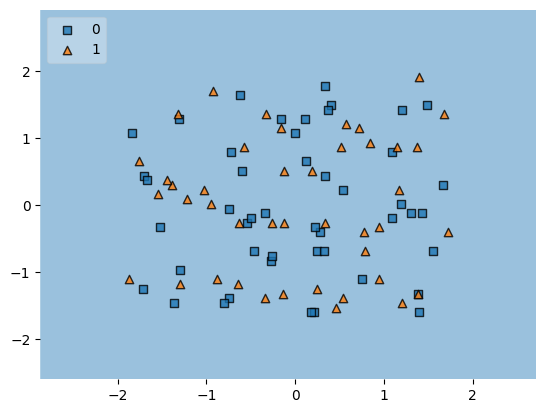

In [53]:
plot_decision_regions(x_train, y_train.values, clf=clf,legend=2)

In [54]:
import pickle

In [55]:
pickle.dump(clf,open('model.pkl','wb'))